Tony Tran - MSDS 432 Fall 2019 - Assignment 1

<h2>Overview</h2>
In assignment 1, we are asked to create multiple arrays and apply different algorithms to the arrays to see how they perform. 5 different arrays of random numbers will be created with sizes 512, 1024, 2048, 4096, and 8192. The algorithms that we will be testing are the sort, linear search, binary search, linear search sorted, and binary search sorted. Performance will be measured by the time it takes to execute the algorithm on the arrays of various lengths. Ideally, we want algorithms to execute will the lowest time and scale by having a low execution time even if the data set increases. 

<h3>References</h3>
<li>https://www.geeksforgeeks.org/linear-search/</li>
<li>https://www.geeksforgeeks.org/binary-search/</li>
<li>https://hackernoon.com/timsort-the-fastest-sorting-algorithm-youve-never-heard-of-36b28417f399</li>
<li>https://www.takeupcode.com/podcast/38-big-o-notation-how-fast-can-you-go/</li>

<h3>Initial Set Up</h3>
<li>Set up five arrays of random numbers of different sizes i.e. 512 numbers, 1024 numbers, 2048 numbers, 4096 numbers, and 8192 numbers using a uniform random number generator.</li> 
<li>Ensure that a common random number seed is used to generate each of the arrays. Use the generator below to select your random number.</li>
<li>Set up data dictionary for table later</li>
<li>Set up function for binary search</li>
<li>Set up function for linear search</li>

In [48]:
#Import packages
import numpy as np
import pandas as pd
from timeit import default_timer as timer
import seaborn as sns

#Set up random seed
np.random.seed(284)

#set up arrays and assign to variables
rand_512 = np.random.randint(1,1000,512)
rand_1024 = np.random.randint(1,1000,1024)
rand_2048 = np.random.randint(1,1000,2048)
rand_4096 = np.random.randint(1,1000,4096)
rand_8192 = np.random.randint(1,1000,8192)

#Add each array into a dict
array_dict = {512:rand_512, 1024: rand_1024, 2048:rand_2048, 4096:rand_4096, \
              8192:rand_8192}

#set up dict with times
data = {'Length':[],
       'Sort_Time':[],
       'Linear_Search_Time':[],
       'Binary_Search_Time':[],
       'Linear_Search_Plus_Sort_Time':[],
       'Binary_Search_Plus_Sort_Time':[]}

'''
Binary Search - Identify the middle value of the array, if it is higher then
use the second half of the array otherwise use the bottom half. Keep repeating
this until you find the value. This reduces the number of elements you have to
search through to find the value. An option to sort array is included.
'''

def binary_search(list, item, sort = False):
    if sort:
        list.sort()
    #low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
    # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
    # Found the item.
        if guess == item:
            return mid
    # The guess was too high.
        if guess > item:
            high = mid - 1
    # The guess was too low.
        else:
            low = mid + 1

  # Item doesn't exist
    return None


'''
Linear Search - search through each item in the array for the variable one by 
one sequentially from the first element to the end until you find it. An 
option to sort array is included.
'''

def linear_search(arr, n, x, sort = False): 
    #arr = array name
    #n = length of array
    #x = value to search for
    if sort:
        arr.sort()
    for i in range (0, n): 
        if (arr[i] == x): 
            return i 
    return -1

In [49]:
'''
Use for loop to append length of each array and time to execute each 
algorithm into the dictionary "data"
'''
for k, v in array_dict.items():
    #append each array length to dict
    data['Length'].append(len(v))
    
    #time sorting of each array and append to dict
    start = timer()
    v.sort()
    end = timer()
    data['Sort_Time'].append(round((end-start)*1000,2))
    
    #unsorted linear search
    start = timer()
    linear_search(v,len(v),max(v))
    end = timer()
    data['Linear_Search_Time'].append(round((end-start)*1000,2))
    
    #unsorted binary search
    start = timer()
    binary_search(v,max(v))
    end = timer()
    data['Binary_Search_Time'].append(round((end-start)*1000,2))
    
    #sorted linear search
    start = timer()
    linear_search(v,len(v),max(v),sort=True)
    end = timer()
    data['Linear_Search_Plus_Sort_Time'].append(round((end-start)*1000,2))
    
    #sorted binary search
    start = timer()
    binary_search(v,max(v),sort=True)
    end = timer()
    data['Binary_Search_Plus_Sort_Time'].append(round((end-start)*1000,2))

In [50]:
#preview data
data

{'Length': [512, 1024, 2048, 4096, 8192],
 'Sort_Time': [0.17, 0.16, 0.1, 0.21, 0.41],
 'Linear_Search_Time': [0.19, 0.45, 0.65, 1.32, 2.51],
 'Binary_Search_Time': [0.06, 0.16, 0.24, 0.48, 0.92],
 'Linear_Search_Plus_Sort_Time': [0.18, 0.35, 0.71, 1.32, 2.44],
 'Binary_Search_Plus_Sort_Time': [0.07, 0.15, 0.26, 0.61, 1.02]}

In [51]:
#convert dictionary into dataframe
df = pd.DataFrame(data, columns = ['Length',
                                   'Sort_Time',
                                   'Linear_Search_Time',
                                   'Binary_Search_Time',
                                   'Linear_Search_Plus_Sort_Time',
                                   'Binary_Search_Plus_Sort_Time'])
df

,Length,Sort_Time,Linear_Search_Time,Binary_Search_Time,Linear_Search_Plus_Sort_Time,Binary_Search_Plus_Sort_Time
0,512,0.17,0.19,0.06,0.18,0.07
1,1024,0.16,0.45,0.16,0.35,0.15
2,2048,0.10,0.65,0.24,0.71,0.26
3,4096,0.21,1.32,0.48,1.32,0.61
4,8192,0.41,2.51,0.92,2.44,1.02


Text(0.5, 1.0, 'Array Length by Sort Time')

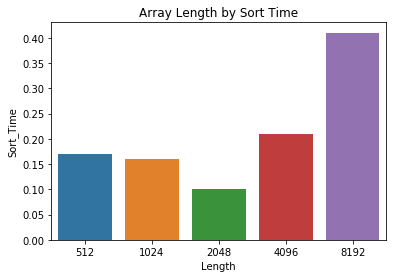

In [52]:
#Graph of Sort time
ax = sns.barplot(x="Length", y="Sort_Time", data=df)
ax.set_title('Array Length by Sort Time')

Text(0.5, 1.0, 'Array Length by Linear Search Time')

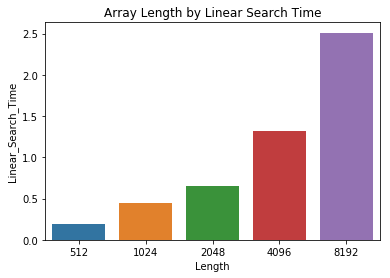

In [53]:
#Graph of Linear Search time
ax = sns.barplot(x="Length", y="Linear_Search_Time", data=df)
ax.set_title('Array Length by Linear Search Time')

Text(0.5, 1.0, 'Array Length by Binary Search Time')

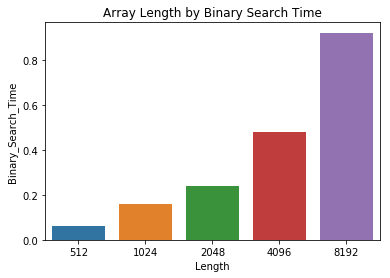

In [54]:
#Graph of Binary Search time
ax = sns.barplot(x="Length", y="Binary_Search_Time", data=df)
ax.set_title('Array Length by Binary Search Time')

Text(0.5, 1.0, 'Array Length by Linear Search Plus Sort Time')

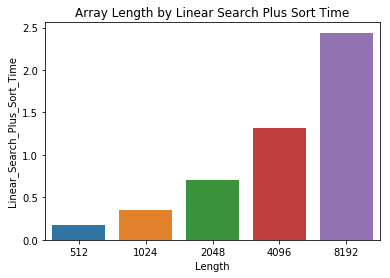

In [55]:
#Graph of Linear Search Plus Sort Time
ax = sns.barplot(x="Length", y="Linear_Search_Plus_Sort_Time", data=df)
ax.set_title('Array Length by Linear Search Plus Sort Time')

Text(0.5, 1.0, 'Array Length by Binary Search Plus Sort Time')

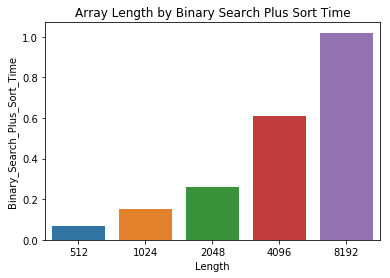

In [56]:
#Graph of Binary Search Plus Sort Time
ax = sns.barplot(x="Length", y="Binary_Search_Plus_Sort_Time", data=df)
ax.set_title('Array Length by Binary Search Plus Sort Time')

<h3>Executive Summary</h3>

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as comments or text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

<h4>Sort algorithm</h4>
In this exercise, I used the default Python built in sorting function which uses the timsort algorithm and runs in O(n log n) time. As the number of elements increases, the execution time increases significantly. This means it runs a little slower than O(n) but is still sufficiently fast.

<h4>Linear search algorithm</h4>
Linear search is an algorithm that goes through each item in a data set one by one starting with the first element and moves on to the next element until it finds the value. This algorithm runs in O(n), which means the execution time is dependent on the number of elements in the dataset. The more elements there are, the longer the execution time. If the largest number is at the beginning then the algorithm will find it on the first try. If the value is at the last element of a data set, then it will have to go through every single element until it gets to that value. As can be seen in the chart on linear search, the larger the number of elements in the array, the longer it takes to find the value. 

<h4>Binary search algorithm</h4>
Binary search is an algorithm that requires a data set to be sorted to work. This section tests the algorithm without search. Since it's unsorted, this will take a long execution time. Binary search finds the halfway point and looks for it. If it's not sorted, then the algorithm will keep jumping back and forth. Looking at the bar chart, you can see that the array with 1024 takes longer to find compared to higher arrays probably because the highest value is hidden somewhere in the array so the algorithm is probably jumping all over the place until it finally finds the value.

<h4>Linear search with sort algorithm</h4>
Sorting actually makes it worse in this case because we are searching for the highest value which is near the end of the array. The algorithm will have to go through every single element until it reaches to end to find the value. 

<h4>Binary search with sort algorithm</h4>
Binary search that's sorted will run in O(log n) which is faster than regular linear search. This is because the algorithm goes through the midway point of a sorted data set and then continues to only search for the data in that half of the data set. In other words, the number of items to search for significantly decreases each time it splits the data set. 

<h4>Takeaways</h4>
If a data set is sorted, then the best algorithm to use is a binary search algorithm because the number of elements do not impact the execution time as much as a linear search does. If the value to search for is the first element, then linear search would've found it faster, but generally this doesn't seem like a common occurrence so it's better to use a binary search. Another key takeaway is that sorting is critical for a binary search algorithm to work. 

